In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from phik import phik_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

In [68]:
def plot_box_and_hist(data, cols):
    sns.set_style("dark")
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(data=data[cols], ax=axes[0], palette="Greens")
    axes[0].set_title('Box with a mustache')
    axes[0].set_ylabel('Value')
    sns.histplot(data[cols], kde=False, ax=axes[1], palette="Reds")
    axes[1].set_title('Histogram')
    axes[1].set_ylabel('Frequency')
    plt.show()

In [3]:
df = pd.read_csv("C:\\Users\\carlf\\OneDrive\\Bureau\\Cours programmation\\archive (11)\\student_exam_data.csv")
df2 = pd.read_csv("C:\\Users\\carlf\\OneDrive\\Bureau\\Cours programmation\\archive (11)\\student_exam_data_new.csv")

In [22]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [18]:
study_hours = df["Study Hours"]
score = df["Previous Exam Score"]
mean_study = df["Study Hours"].mean()
mean_score = df["Previous Exam Score"].mean()

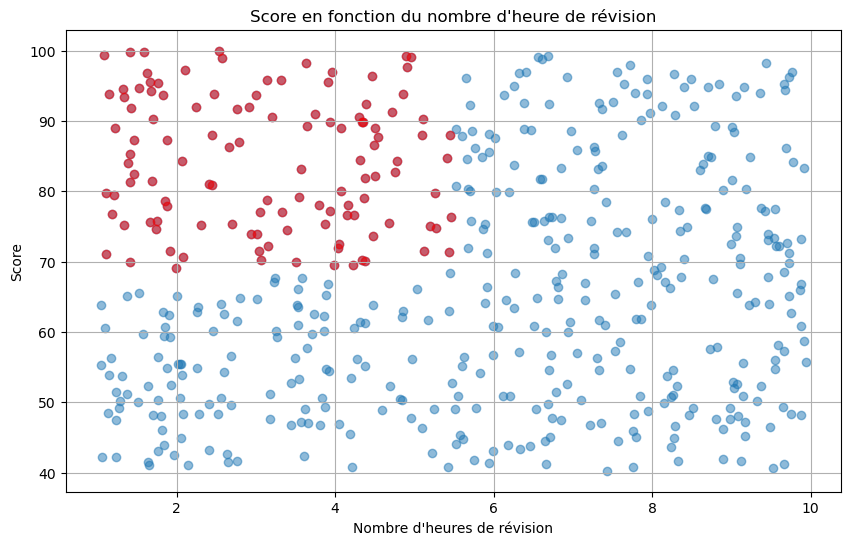

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(study_hours, score, alpha=0.5)

#Colore en rouge les élèves ayant une un score supérieur à la moyenne avec
#un temps de révision inférieur à celle-ci.
for i in range(len(study_hours)):
    if study_hours[i] < mean_study and score[i] > mean_score:
        plt.scatter(study_hours[i], score[i], color='red', alpha=0.5)

plt.title("Score en fonction du nombre d'heure de révision")
plt.xlabel("Nombre d'heures de révision")
plt.ylabel("Score")
plt.grid(True)
plt.show()

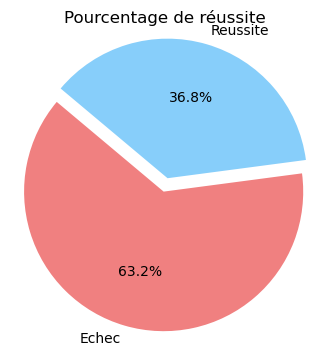

In [28]:
name = ["Echec", "Reussite"]
colors= ['lightcoral', 'lightskyblue']

plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=name, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1,0))
plt.title('Pourcentage de réussite')
plt.axis('equal')  # Assure que le graphique est un cercle plutôt qu'une ellipse
plt.show()

#Régression logistique

In [52]:
X = df[["Study Hours","Previous Exam Score"]]
y = df["Pass/Fail"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
model = LogisticRegression()


In [56]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [57]:
y_pred = model.predict(X_test_scaled)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#Précision de 0.86 mais ça peut être mieux 

Accuracy: 0.86


In [60]:
# Afficher la matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[58  6]
 [ 8 28]]


In [73]:
#Decision Tree

In [63]:
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 12
)

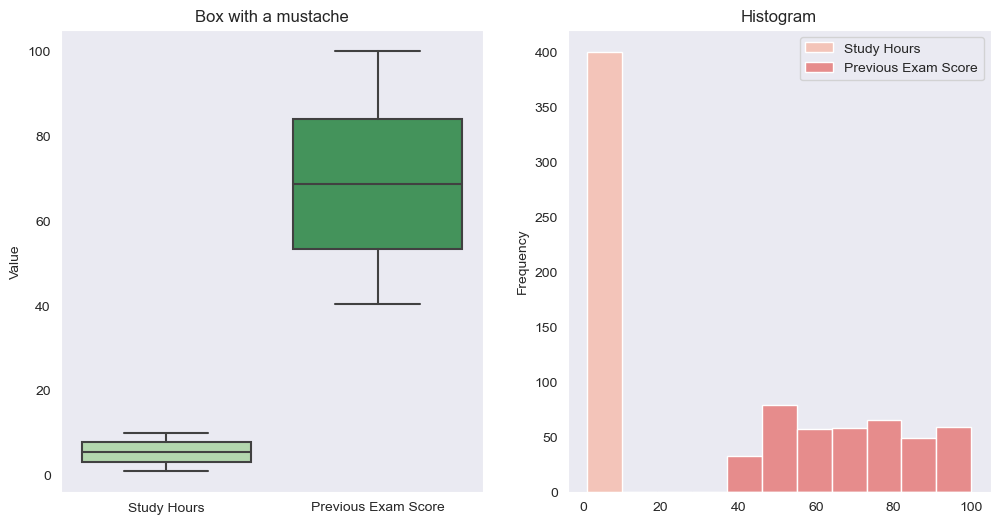

In [69]:
plot_box_and_hist(X_train, ['Study Hours', 'Previous Exam Score'])

In [70]:
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [71]:
X_train_scalled = pd.DataFrame(data=X_train_scalled, columns = ['Study Hours', 'Previous Exam Score'])
X_test_scalled = pd.DataFrame(data=X_test_scalled, columns = ['Study Hours', 'Previous Exam Score'])

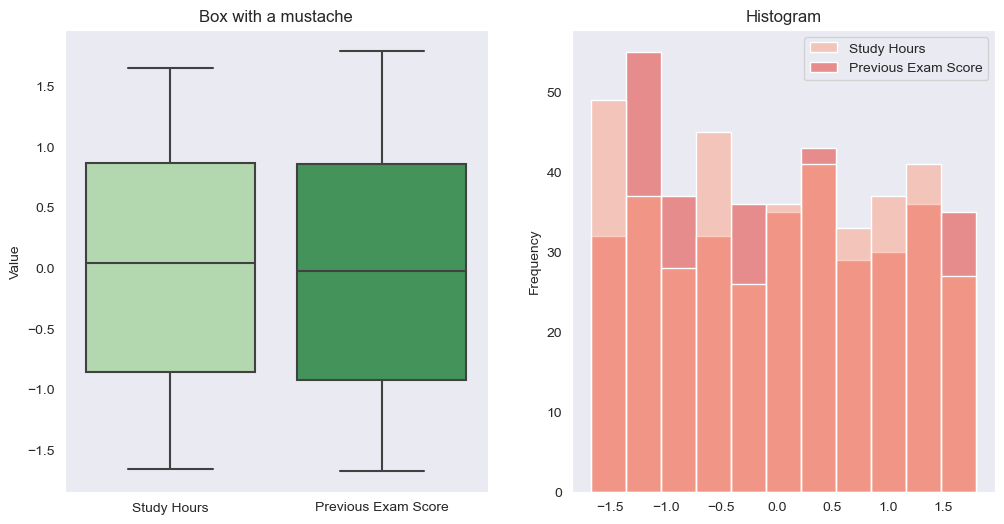

In [72]:
plot_box_and_hist(X_train_scalled, ['Study Hours', 'Previous Exam Score'])

In [77]:
tree_model = DecisionTreeClassifier(random_state=12)
tree_model.fit(X_train_scalled, y_train)

DecisionTreeClassifier(random_state=12)

In [78]:
y_pred = tree_model.predict(X_test_scalled)

In [79]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')

Accuracy score: 1.0


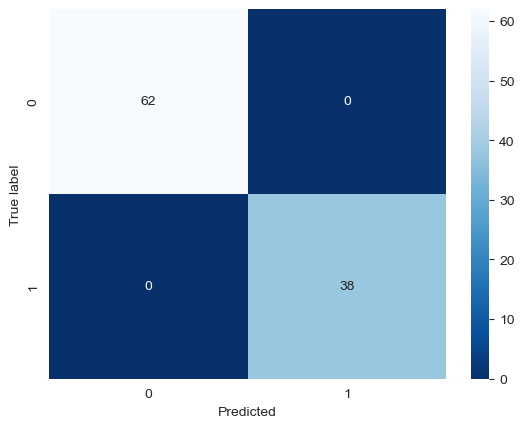

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [82]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)